# MIT Parco Macchine Italia

## Data description and Data preparation


Il Ministero dei Trasporti pubblica in formato aperto i dati relativi al parco macchine circolante e le patenti di guida regione per regione.


### Parco circolante veicoli
- [Parco Circolante](http://dati.mit.gov.it/catalog/dataset/parco-circolante-dei-veicoli)

Questo dataset contiene il parco circolante dei veicoli su strada ( categorie Autoveicoli e Motoveicoli ) diviso per regione estratto dall'archivio nazionale dei veicoli gestito dalla Motorizzazione.

I dati si riferiscono alla situazione del parco vetture al 31/10/2017

-[Qui](http://dati.mit.gov.it/catalog/dataset/60a57c60-758c-4bd9-8d87-c286b797c289/resource/5d21aa87-a57d-42ee-b504-7da3218152be/download/metadata-parco-circolante-vetture.pdf) la scheda contenente i metadati


### Auto Eco friendly
Inoltre in questo notebook verrà segmentato il dataset complessivo del parco macchine sui veicoli "Eco_friendly" in modo da condurre un'analisi esplorativa nel notebook successivo

Questo primo notebook si occupa quindi di caricare tutti i dati del parco macchine regione per regione, eseguire alcune operazioni di utilità ed infine estratte un unico dataframe con solamente le auto che appartengono alle categorie scelte.
In particolare verrà filtrato il campo "alimentazione" per i seguenti valori:

- 'METANO'
- 'ELETTR'
- 'GPL'
- 'B/GPL'
- 'B/MET'
- 'IBRIDO BENZINA/ELETTRICO'
- 'IBRIDO GASOLIO/ELETTRICO'

In [3]:
%matplotlib inline 
import datetime
import csv
import os
import glob
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import missingno as msno
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

mpl.rcParams['figure.figsize'] = (14.0, 9.0)

sns.set_context("notebook")
sns.set()
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("Set2", 10))

style.use('fivethirtyeight')

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# Seaborn for pairplots
sns.set_context('talk', font_scale=1.2);

## Parco Macchine
### Part 1: Loading and Cleaning with Pandas - quick checks Parco macchine



In [6]:
folder_dati = "../data/parco"
folder = glob.glob('./'+folder_dati+'/*.csv')

list_ =[]
for file_ in folder:
    print (file_)
    name = (os.path.basename(file_)).split(".")[0]
    
    #leggo il dataset originario
    df = pd.read_csv(file_, sep=",", encoding="ISO-8859-1", decimal=",",low_memory=False)
    print (len(df))
    list_.append(df)
parco = pd.concat(list_)
len(parco)

./../data/parco/parco_circolante_Calabria.csv
1631868
./../data/parco/parco_circolante_Molise.csv
289473
./../data/parco/parco_circolante_EmiliaRomagna.csv
3859415
./../data/parco/parco_circolante_Veneto.csv
4052513
./../data/parco/parco_circolante_Umbria.csv
824464
./../data/parco/parco_circolante_Sardegna.csv
1363193
./../data/parco/parco_circolante_Liguria.csv
1383184
./../data/parco/parco_circolante_Puglia.csv
3050018
./../data/parco/parco_circolante_Abruzzo.csv
1170438
./../data/parco/parco_circolante_Lazio.csv
5341091
./../data/parco/parco_circolante_Piemonte.csv
3858373
./../data/parco/parco_circolante_FriuliVeneziaGiulia.csv
1042494
./../data/parco/parco_circolante_Lombardia.csv
8214282
./../data/parco/parco_circolante_Marche.csv
1379921
./../data/parco/parco_circolante_ValleAosta.csv
252531
./../data/parco/parco_circolante_Basilicata.csv
476862
./../data/parco/parco_circolante_Toscana.csv
3499371
./../data/parco/parco_circolante_TrentinoAltoAdige.csv
1397194
./../data/parco/pa

52165189

Il totale del parco macchine ammonta a **52.165.189 veicoli** (autoveicoli e motoveicoli)
Calcola il rapporto con il numero di abitanti.

In [7]:
#Cast data_immatricolazione to datetime
parco['data_immatricolazione'] = pd.to_datetime(parco['data_immatricolazione'])

In [8]:
parco.dtypes

id                                  int64
progressivo                         int64
tipo_veicolo                       object
destinazione                       object
uso                                object
comune_residenza                   object
provincia_residenza                object
regione_residenza                  object
eta_intestatario                  float64
sesso                              object
marca                              object
cilindrata                         object
alimentazione                      object
kw                                float64
data_immatricolazione      datetime64[ns]
classe_euro                       float64
emissioni_co2                      object
massa_complessiva                 float64
revisione_in_regola                object
assicurazione_in_regola            object
dtype: object

In [9]:
print(parco.shape)

(52165189, 20)


In [10]:
parco.head(5)

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,data_immatricolazione,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
0,1647312,124592,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ZUMPANO,COSENZA,CALABRIA,65.000,M,NaN,1990.00,BENZ,96.000,1974-01-01,0.000,NaN,1390.000,N,N
1,1647313,139878,M,TRICICLO PER TRASPORTO COSE,PROPRIO,MELICUCCO,REGGIO DI CALABRIA,CALABRIA,85.000,M,NaN,218.00,B/OLIO,8.000,NaT,0.000,NaN,1160.000,N,S
2,1647314,184563,M,MOTOCICLO PER TRASPORTO PERSONE,PROPRIO,CROTONE,CROTONE,CALABRIA,51.000,M,NaN,903.00,BENZ,56.000,1976-01-01,0.000,NaN,nan,S,S
3,1647363,957766,A,AUTOCARRO PER TRASPORTO DI COSE,PROPRIO,RENDE,COSENZA,CALABRIA,46.000,M,OPEL,1995.00,GASOL,84.000,2009-02-16,4.000,NaN,2770.000,N,N
4,1647602,4068491,A,AUTOCARRO PER TRASPORTO DI COSE,PROPRIO,CUTRO,CROTONE,CALABRIA,30.000,M,NaN,3455.00,GASOL,60.000,1976-01-01,0.000,NaN,3500.000,S,S


In [11]:
all_columns = parco.columns.tolist()
all_columns

['id',
 'progressivo',
 'tipo_veicolo',
 'destinazione',
 'uso',
 'comune_residenza',
 'provincia_residenza',
 'regione_residenza',
 'eta_intestatario',
 'sesso',
 'marca',
 'cilindrata',
 'alimentazione',
 'kw',
 'data_immatricolazione',
 'classe_euro',
 'emissioni_co2',
 'massa_complessiva',
 'revisione_in_regola',
 'assicurazione_in_regola']

In [12]:
parco.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52165189.000,26082595.000,15058793.100,1.000,13041298.000,26082595.000,39123892.000,52165189.000
progressivo,52165189.000,26082595.000,15058793.100,1.000,13041298.000,26082595.000,39123892.000,52165189.000
eta_intestatario,46312796.000,53.726,14.639,0.000,43.000,53.000,64.000,2017.000
kw,52116408.000,65.268,40.385,0.000,44.000,57.000,81.000,1000.000
classe_euro,52165175.000,3.240,1.786,0.000,2.000,4.000,5.000,6.000
massa_complessiva,51906600.000,1808.169,2268.266,0.000,1305.000,1560.000,1885.000,99999.000


#### Check Valori nulli nel DataFrame Parco macchine completo

In [ ]:
parco.isnull().sum()

In [ ]:
len(parco)

### [Missingno](https://github.com/ResidentMario/missingno)

missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness of your dataset.

**Matrix**: data-dense display which lets you quickly visually pick out patterns in data completion.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

In [ ]:
msno.matrix(parco)

### Seziono il campo tipo_veicolo
Creo per comodità un dataset contenente solo gli autoveicoli e uno solo i motoveicoli

In [13]:
parco.tipo_veicolo.value_counts()

A    44961663
M     7203526
Name: tipo_veicolo, dtype: int64

In [14]:
auto = parco[parco.tipo_veicolo=="A"]
moto = parco[parco.tipo_veicolo=="M"]

In [ ]:
print ("Parco totale: "+ str(len(parco)) + " di cui AUTO: "+ str(len(auto)) + ", di cui MOTO: " +str(len(moto)))

## Part 2 - Global properties 
### Descrizione e analisi di ogni campo del dataset

###  - **progressivo**: 
Questa colonna contiene il numero progressivo del veicolo come record nel datase

### - tipo veicolo

Questa colonna contiene il tipo di veicolo (**A** = Autoveicolo, **M** = Motoveicolo)

In [ ]:
parco.tipo_veicolo.value_counts()

In [ ]:
print ("record nulli: "+ str(parco.tipo_veicolo.isnull().sum()) + 
       " - : "+ str(round((parco.tipo_veicolo.isnull().sum()/len(parco)*100),2))+ "% ")

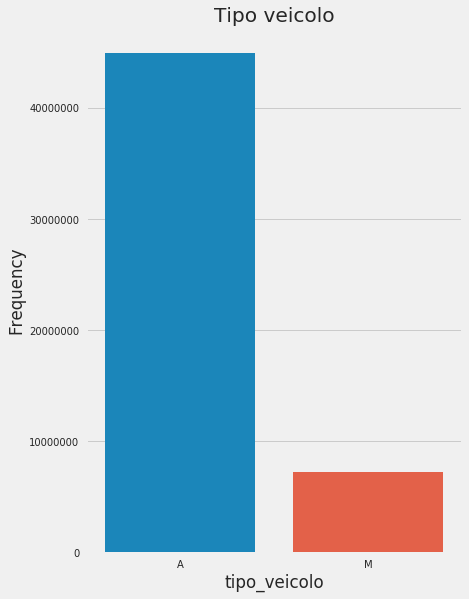

In [32]:
ax = sns.countplot(x="tipo_veicolo",  data=parco)
ax.set_title("Tipo veicolo")
ax.set_ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='y')

### - destinazione

Questa colonna contiene la destinazione del veicolo. Per destinazione del veicolo s'intende la sua utilizzazione in base alle caratteristiche tecniche. 

Per A gli autoveicoli: 

- AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO, 
- AUTOVEICOLO USO ESCLUSIVO DI POLIZIA
- AUTOVETTURA PER TRASPORTO DI PERSONE
- AUTOBUS PER TRASPORTO DI PERSONE 
- AUTOCARRO PER TRASPORTO DI COSE
- AUTOCARAVAN
- AUTOVEICOLO PER USO SPECIALE
- TRAS.SPECIFICO PERSONE PART.CONDIZIONI
- AUTOVEIC. TRASP. PROMISCUO PERSONE/COSE 
- TRATTORE STRADALE PER RIMORCHIO,TRATTORE PER SEMIRIMORCHIO . 

Per M i Motoveicoli: 

- QUADRICICLO PER TRASPORTO DI PERSONE
- QUADRICICLO PER TRASPORTO DI COSE
- QUADRICICLO PER USO SPECIALE,QUADRICICLO TRASPORTO SPECIFICO
- MOTOVEICOLO USO ESCLUSIVO DI POLIZIA
- TRICICLO PER TRASPORTO PROMISCUO
- TRICICLO PER USO SPECIALE
- TRICICLO PER TRASPORTO SPECIFICO
- MOTOCICLO PER TRASPORTO PERSONE
- TRICICLO PER TRASPORTO COSE
- TRICICLO PER TRASPORTO DI PERSONE.

In [ ]:
print ("record nulli: "+ str(parco.destinazione.isnull().sum()) + 
       " - : "+ str(round((parco.destinazione.isnull().sum()/len(parco)*100),2))+ "% ")

In [35]:
auto.destinazione.value_counts()

AUTOVETTURA PER TRASPORTO DI PERSONE                     39161407
AUTOCARRO PER TRASPORTO DI COSE                           4151272
AUTOVEIC.TRASP.PROMISCUO PERSONE/COSE                      601596
AUTOCARAVAN                                                279698
AUTOVEICOLO PER TRASPORTO SPECIFICO                        274121
AUTOVEICOLO PER USO SPECIALE                               193042
TRATTORE PER SEMIRIMORCHIO                                 167726
AUTOBUS PER TRASPORTO DI PERSONE                            96479
AUTOVEICOLO USO ESCLUSIVO DI POLIZIA                         7849
TRAS.SPECIFICO PERSONE PART.CONDIZIONI                       4964
TRATTORE STRADALE PER RIMORCHIO                               488
AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO         346
VEICOLO SPECIALE USO AUTOSCUOLA                                77
AUTOVEICOLO PER USO SPECIALE DELLA POLIZIA LOCALE              29
Name: destinazione, dtype: int64

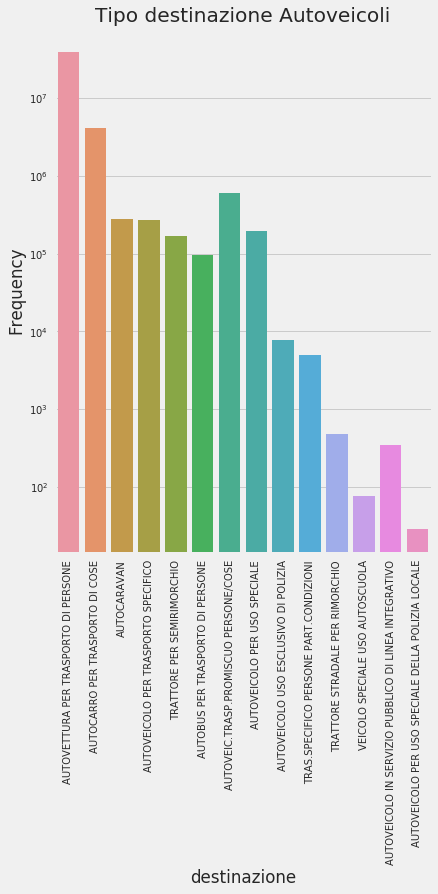

In [37]:
ax = sns.countplot(x="destinazione",  data=auto)
ax.set_title("Tipo destinazione Autoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
ax.figure.get_axes()[0].set_yscale('log')

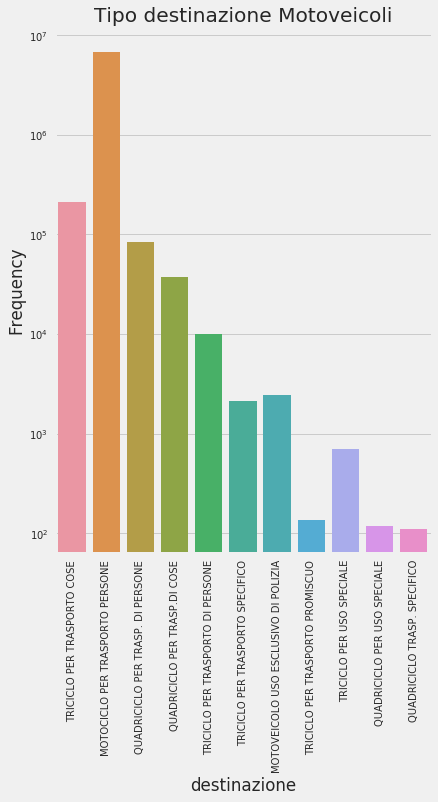

In [39]:
ax = sns.countplot(x="destinazione",  data=moto)
ax.set_title("Tipo destinazione Motoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
ax.figure.get_axes()[0].set_yscale('log')

### - uso 

Questa colonna contiene il tipo d'uso del veicolo. 

Per uso del veicolo s'intende la sua utilizzazione economica. I veicoli possono essere adibiti a uso proprio o a uso di terzi. 
- Proprio
- Di terzi da noleggio con conducente
- di terzi da locare senza conducente
- Di terzi
- Di terzi con autorizzazione vincolate
- Di terzi con autorizzazione libera
- Uso speciale

In [ ]:
print ("record nulli: "+ str(parco.uso.isnull().sum()) + 
       " - : "+ str(round((parco.uso.isnull().sum()/len(parco)*100),2))+ "% ")

In [38]:
parco.uso.value_counts()

PROPRIO                                  50324634
DI TERZI DA LOCARE SENZA CONDUC.          1171487
DI TERZI CON AUTORIZZAZIONE LIBERA         280779
DI TERZI CON AUTORIZZAZIONI VINCOLATE      213182
DI TERZI                                    80944
DI TERZI DA NOLEGGIO CON CONDUC.            58839
USO SPECIALE                                 4277
PRIV.,LOCAZIONE FAC. COMPERA                    4
Name: uso, dtype: int64

In [57]:
auto.uso.value_counts()

PROPRIO                                  43152207
DI TERZI DA LOCARE SENZA CONDUC.          1150721
DI TERZI CON AUTORIZZAZIONE LIBERA         279608
DI TERZI CON AUTORIZZAZIONI VINCOLATE      212676
DI TERZI                                    80883
DI TERZI DA NOLEGGIO CON CONDUC.            58698
USO SPECIALE                                 4277
PRIV.,LOCAZIONE FAC. COMPERA                    4
Name: uso, dtype: int64

In [58]:
moto.uso.value_counts()

PROPRIO                                  7172427
DI TERZI DA LOCARE SENZA CONDUC.           20766
DI TERZI CON AUTORIZZAZIONE LIBERA          1171
DI TERZI CON AUTORIZZAZIONI VINCOLATE        506
DI TERZI DA NOLEGGIO CON CONDUC.             141
DI TERZI                                      61
Name: uso, dtype: int64

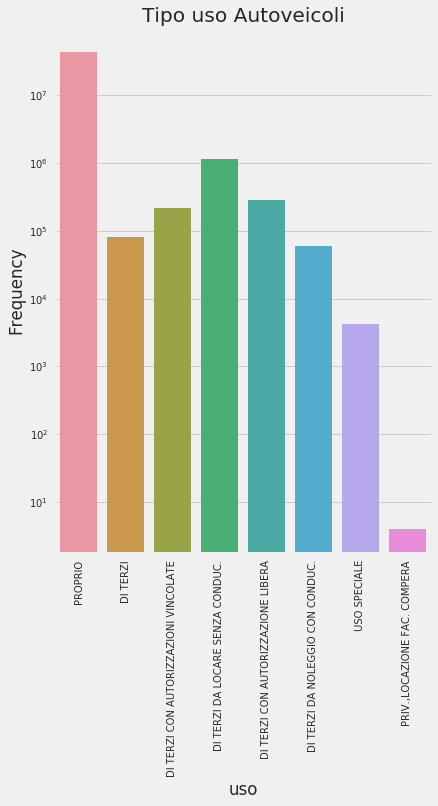

In [42]:
ax = sns.countplot(x="uso",  data=auto)
ax.set_title("Tipo uso Autoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
ax.figure.get_axes()[0].set_yscale('log')

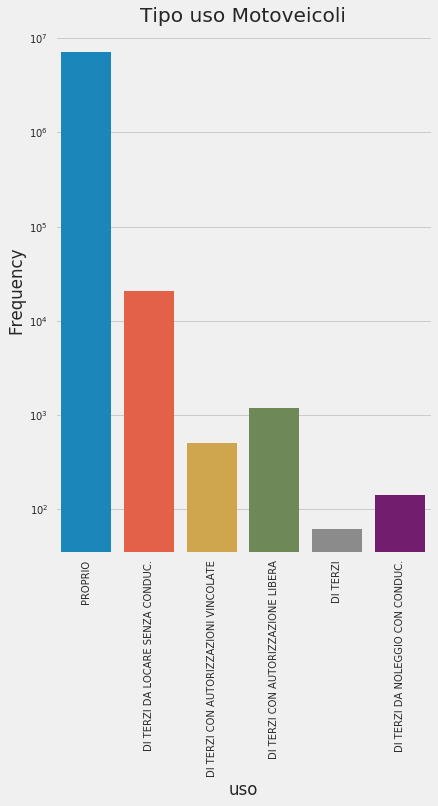

In [43]:
ax = sns.countplot(x="uso",  data=moto)
ax.set_title("Tipo uso Motoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
ax.figure.get_axes()[0].set_yscale('log')

### - comune residenza 

Questa colonna contiene il comune dove risiede l'intestatario del veicolo

In [ ]:
print ("record nulli: "+ str(parco.comune_residenza.isnull().sum()) + 
       " - : "+ str(round((parco.comune_residenza.isnull().sum()/len(parco)*100),2))+ "% ")

### - provincia residenza

Questa colonna contiene la provincia dove risiede l'intestatario del veicolo

In [ ]:
print ("record nulli: "+ str(parco.provincia_residenza.isnull().sum()) + 
       " - : "+ str(round((parco.provincia_residenza.isnull().sum()/len(parco)*100),2))+ "% ")

### - età intestatario

Questa colonna contiene l'età dell'intestatario del veicolo alla data di produzione del dataset

In [ ]:
print ("record nulli: "+ str(parco.eta_intestatario.isnull().sum()) + 
       " - : "+ str(round((parco.eta_intestatario.isnull().sum()/len(parco)*100),2))+ "% ")

### - sesso

Questa colonna contiene il sesso dell'intestatario del veicolo

In [ ]:
print ("record nulli: "+ str(parco.sesso.isnull().sum()) + 
       " - : "+ str(round((parco.sesso.isnull().sum()/len(parco)*100),2))+ "% ")

In [44]:
parco.sesso.value_counts()

M    30872396
F    15148043
           69
Name: sesso, dtype: int64

In [60]:
auto.sesso.value_counts()

M    24976456
F    14116705
           55
Name: sesso, dtype: int64

In [61]:
moto.sesso.value_counts()

M    5895940
F    1031338
          14
Name: sesso, dtype: int64

In [ ]:
ax = sns.countplot(x="sesso", hue="tipo_veicolo", data=parco)
ax.set_title("Gender dimension")
ax.set_ylabel("Frequency")
#ax.legend(labels=labels_sleep_legend)

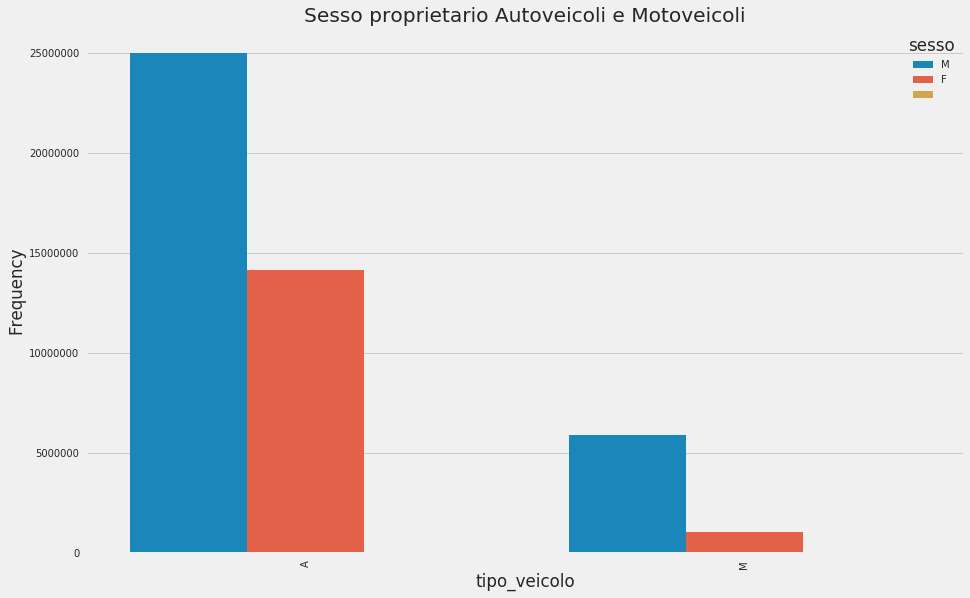

In [59]:
ax = sns.countplot(x="tipo_veicolo", hue="sesso", data=parco)
ax.set_title("Sesso proprietario Autoveicoli e Motoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')

### - marca

Questa colonna contiene la marca del veicolo

In [ ]:
print ("record nulli: "+ str(parco.marca.isnull().sum()) + 
       " - : "+ str(round((parco.marca.isnull().sum()/len(parco)*100),2))+ "% ")

In [ ]:
auto.marca.value_counts()

In [ ]:
moto.marca.value_counts()

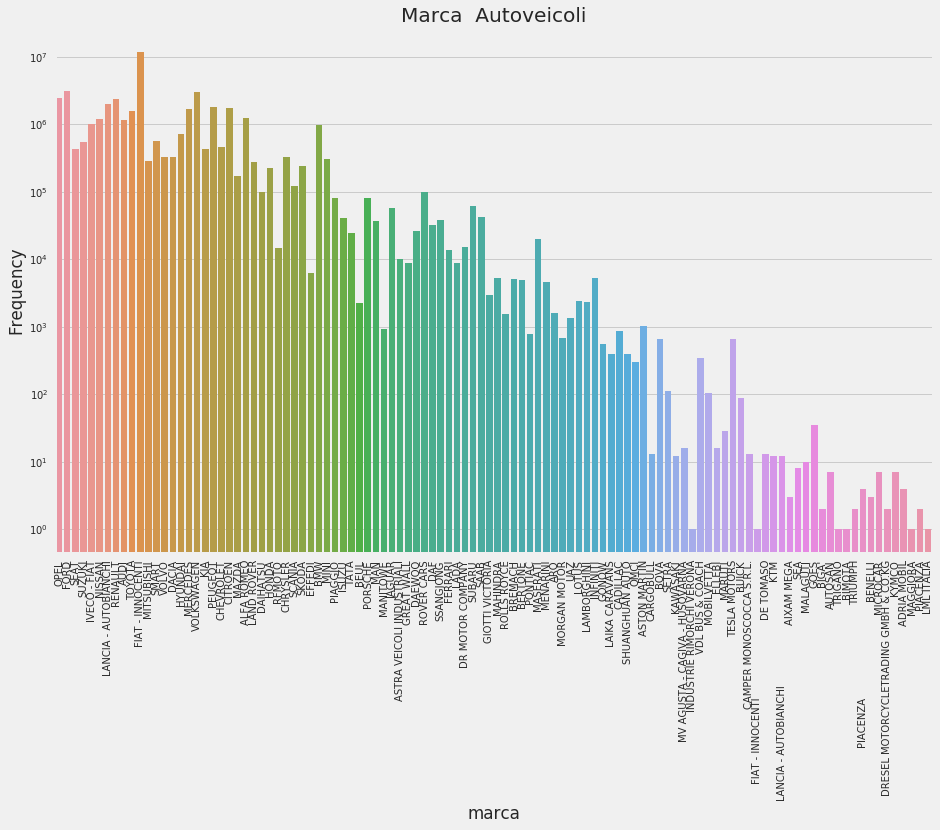

In [55]:
ax = sns.countplot(x="marca",  data=auto)
ax.set_title("Marca  Autoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')
ax.figure.get_axes()[0].set_yscale('log')

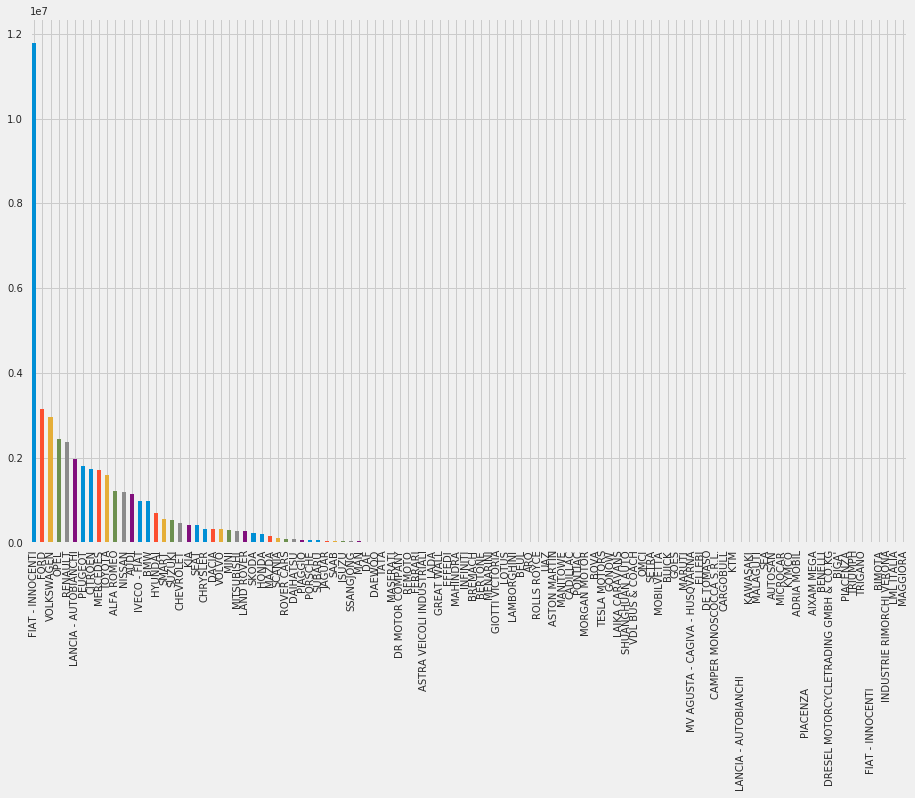

In [56]:
auto['marca'].value_counts().plot(kind="bar")

In [ ]:
ax = sns.countplot(x="marca",  data=auto)
ax.set_title("Marca  Motoveicoli")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
data.boxplot(column="ApplicantIncome",by="Loan_Status")

### - cilindrata

Questa colonna contiene la cilindrata del veicolo misurata in centimetro cubo (cm3).

In [ ]:
print ("record nulli: "+ str(parco.cilindrata.isnull().sum()) + 
       " - : "+ str(round((parco.cilindrata.isnull().sum()/len(parco)*100),2))+ "% ")

### - alimentazione

Questa colonna contiene l'alimentazione del motore del veicolo, ossia il tipo di combustibile 
- GASOLIO/METANO
- GASOLIO/GPL
- BENZINA
- BENZINA/OLIO
- BENZINA/WANK
- ELETTRICA
- GASOLIO
- GPL
- BENZINA/GPL
- BENZINA/METANO
- METANO
- MISCELA
- PETROLIO
- IBRIDO BENZINA/ELETTRICO
- IBRIDO GASOLIO/ELETTRICO
- BENZINA/ETANOLO

In [ ]:
print ("record nulli: "+ str(parco.alimentazione.isnull().sum()) + 
       " - : "+ str(round((parco.alimentazione.isnull().sum()/len(parco)*100),2))+ "% ")

In [62]:
auto.alimentazione.value_countsunts()

GASOL                       22310070
BENZ                        18361609
B/GPL                        2960781
B/MET                         990240
IBRIDO BENZINA/ELETTRICO      170876
METANO                        108571
ELETTR                         12512
IBRIDO GASOLIO/ELETTRICO        3778
B/WANK                          1146
GPL                              822
MISCELA                          712
B/ETA                            285
B/OLIO                           107
Name: alimentazione, dtype: int64

In [ ]:
auto['alimentazione'].value_counts().plot(kind="bar")

### - data immatricolazione

Questa colonna contiene la data di immatricolazione del veicolo

Come si puà vedere da alcuni grafici e dati sotto, c'è del rumore in testa dati da veicoli con dati di immatricolazione che in parte sono palesemente sbagliati.

In [15]:
print ("record nulli: "+ str(parco.data_immatricolazione.isnull().sum()) + 
       " - : "+ str(round((parco.data_immatricolazione.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 134237 - : 0.26% 


In [ ]:
auto.data_immatricolazione

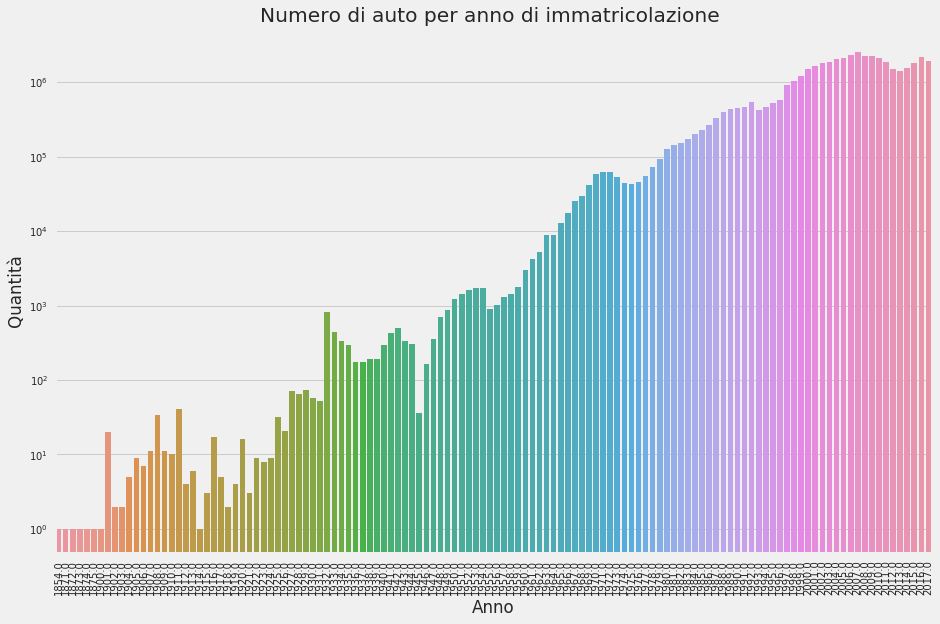

In [54]:
ax = sns.countplot(x=auto["data_immatricolazione"].dt.year,  data=auto)
ax.set_title("Numero di auto per anno di immatricolazione ");
ax.set_ylabel("Quantità");
ax.set_xlabel("Anno");
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.figure.get_axes()[0].set_yscale('log')

In [ ]:
#SEt data immatricolazione as index
auto = auto.set_index('data_immatricolazione')

In [ ]:
# ci sono delle stagionalità sulle immatricolazioni?
monthly = auto.resample(rule='M').count()

### - classe euro

Questa colonna contiene la classe ambientale di appartenenza (categoria Euro) di autoveicoli:

- pre-Euro 1, Euro 1, Euro 2, Euro 3, Euro 4, Euro 5, Euro 6

e motoveicoli 
- pre-Euro 1, Euro 1, Euro 2, Euro 3

definita dalle direttive europee rispettate nell'anno di produzione e che è riportata nel libretto di circolazione.

In [ ]:
print ("record nulli: "+ str(parco.classe_euro.isnull().sum()) + 
       " - : "+ str(round((parco.classe_euro.isnull().sum()/len(parco)*100),2))+ "% ")

### - emissioni co2

Questa colonna contiene l’emissione CO2 del veicolo misurate in g/km ossia grammi al chilometro.

In [ ]:
print ("record nulli: "+ str(parco.emissioni_co2.isnull().sum()) + 
       " - : "+ str(round((parco.emissioni_co2.isnull().sum()/len(parco)*100),2))+ "% ")

### - massa complessiva

Questa colonna contiene la massa complessiva del veicolo misurata attraverso il suo peso in chilogrammi (Kg). 

Si definisce massa complessiva la massa del veicolo in ordine di marcia (tara) più tutto il suo carico (portata).

In [ ]:
print ("record nulli: "+ str(parco.massa_complessiva.isnull().sum()) + 
       " - : "+ str(round((parco.massa_complessiva.isnull().sum()/len(parco)*100),2))+ "% ")

### - revisone in regola s/n

Questa colonna contiene lo stato dell'obbligo di revisione del veicolo (S= SI, N=NO) ai fini della circolazione.

In [ ]:
print ("record nulli: "+ str(parco.revisione_in_regola.isnull().sum()) + 
       " - : "+ str(round((parco.revisione_in_regola.isnull().sum()/len(parco)*100),2))+ "% ")

### - assicurazione in regola s/n

Questa colonna contiene lo stato dell'obbligo dell'assicurazione del veicolo (S= SI, N=NO) ai fini della circolazione.

In [ ]:
print ("record nulli: "+ str(parco.assicurazione_in_regola.isnull().sum()) + 
       " - : "+ str(round((parco.assicurazione_in_regola.isnull().sum()/len(parco)*100),2))+ "% ")

In [ ]:
auto['eta_intestatario'].describe()

In [ ]:
len(auto)

Sono 44.961.663 gli autoveicoli immatricolati nel nostro paese al 31 ottobre 2017.
Considerando che la popolazione italiana si stima essere 60.905.976 abitanti (al 21 ottobre 2016), 

### Campi di interesse Parco Macchine: 

- revisione_in_regola, 

- assicurazione_in_regola      

In [ ]:
parco.revisione_in_regola.value_counts()

In [ ]:
parco.assicurazione_in_regola.value_counts()

In [ ]:
##
- Dove si trovano le auto con le revisioni da effettuare?
- Dove si trovano le auto con l'assicurazione da affettuare?
- Fare normalizzazione tra abitanti e veicoli
- vedere quali sono le regioni più inquinanti rapporttate con abitanti?

## Part 3 - Aggiunta nuovi campo

### - Età veicolo


La data minima del parco macchine, vedere poi a quale si riferisce

In [17]:
min(auto['data_immatricolazione'])

Timestamp('1854-03-17 00:00:00')

In [18]:
min(moto['data_immatricolazione'])

NaT

In [87]:
max(auto['data_immatricolazione'])

Timestamp('2017-10-27 00:00:00')

In [ ]:
max(auto['data_immatricolazione'])

In [94]:
parco["eta_veicolo"]= (pd.Timestamp("today")- parco.data_immatricolazione).astype('timedelta64[Y]')

In [96]:
min(parco['eta_veicolo'])

0.0

In [97]:
max(parco['eta_veicolo'])

164.0

### Setto come indice il campo data immatricolazione su auto

In [19]:
auto = auto.set_index('data_immatricolazione')

In [23]:
_1920 = auto['1800-01-01': '1920-01-01']

In [24]:
len(_1920)

215

In [26]:
_1920

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
data_immatricolazione,,,,,,,,,,,,,,,,,,,
1911-08-08,1912661,6080000,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,REGGIO DI CALABRIA,REGGIO DI CALABRIA,CALABRIA,65.000,M,FIAT - INNOCENTI,770.00,BENZ,25.000,0.000,NaN,1100.000,N,N
1901-01-01,2257065,16745055,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,PALMI,REGGIO DI CALABRIA,CALABRIA,58.000,M,NaN,499.00,BENZ,13.000,0.000,NaN,850.000,N,N
1907-01-01,2652460,27089902,A,TRATTORE PER SEMIRIMORCHIO,DI TERZI CON AUTORIZZAZIONI VINCOLATE,SAN SOSTENE,CATANZARO,CALABRIA,68.000,M,NaN,17174.00,GASOL,259.000,0.000,NaN,18000.000,N,N
1905-08-15,2821180,33707656,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CROTONE,CROTONE,CALABRIA,52.000,M,FIAT - INNOCENTI,1301.00,GASOL,33.000,0.000,NaN,1200.000,N,N
1920-01-01,2913810,37243631,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ROGGIANO GRAVINA,COSENZA,CALABRIA,72.000,M,MERCEDES,499.00,BENZ,13.000,0.000,NaN,840.000,S,S
1919-01-01,29293990,36457726,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,MACCHIA D'ISERNIA,ISERNIA,MOLISE,55.000,M,FIAT - INNOCENTI,903.00,BENZ,33.000,0.000,NaN,1080.000,N,N
1908-05-12,29187624,19610369,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CAMPOBASSO,CAMPOBASSO,MOLISE,52.000,M,FIAT - INNOCENTI,1697.00,GASOL,42.000,0.000,NaN,1470.000,N,N
1909-01-01,29162650,14364548,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,MONTENERO DI BISACCIA,CAMPOBASSO,MOLISE,53.000,F,NaN,652.00,BENZ,18.000,0.000,NaN,920.000,N,N
1916-01-01,7930737,268770,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,LUGO,RAVENNA,EMILIA-ROMAGNA,52.000,M,FIAT - INNOCENTI,1585.00,B/MET,74.000,0.000,NaN,1370.000,N,N


In [29]:
auto_y=auto.groupby('marca').count()

In [31]:
len(auto_y)

108

In [32]:
test = auto.groupby( [auto.index.year, auto.index.month] ).count()

In [27]:
yearly = auto.resample(rule='Y').count()

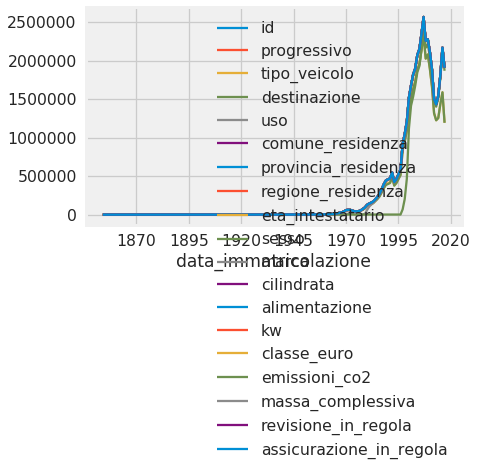

In [28]:
yearly.plot()

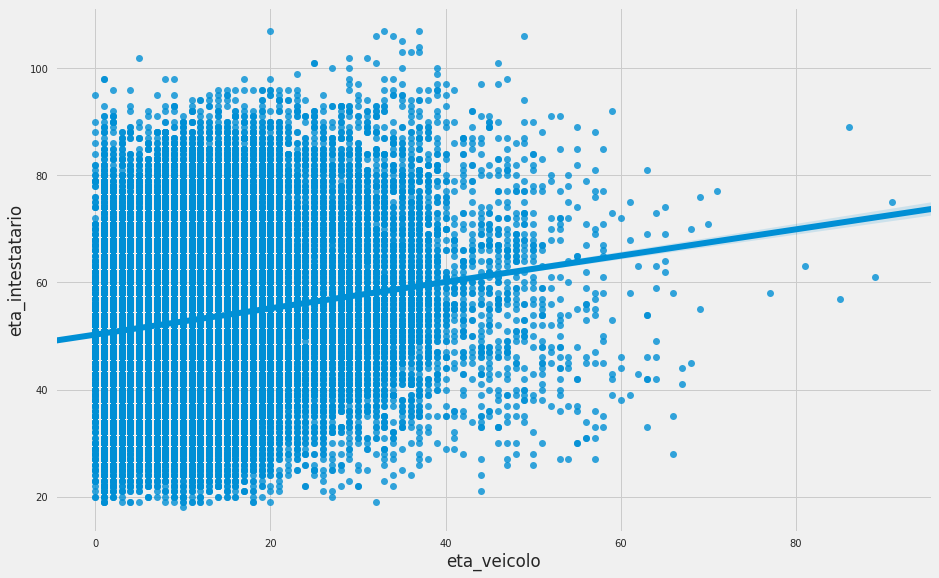

In [102]:
ax1 = sns.regplot(data=parco.sample(50000), x="eta_veicolo", y="eta_intestatario")


## Part 4 - Focus Auto ecologiche

#### Strip campo "alimentazione"

In [ ]:
parco.alimentazione = parco.alimentazione.str.strip()

#### Definisco i valori del campo alimentazioni classificati come auto "ecologiche"

In [ ]:
eco_labels = ['METANO',
              'ELETTR',
              'GPL',
              'B/GPL',
              'B/MET',
              'IBRIDO BENZINA/ELETTRICO',
              'IBRIDO GASOLIO/ELETTRICO']

#### ECO = dataframe con sottoinsieme di parco macchine eco
##### Seziono su eco_labels l'interno parco macchine, comprensivo sia di autoveicoli che motoveicoli

(A = Autoveicolo, M = Motoveicolo)

In [ ]:
eco = parco.loc[parco['alimentazione'].isin(eco_labels)]

In [ ]:
print (str(len(parco))+ " Veicoli totali - " +str(len(eco)) +" Veicoli ECOlogici")

In [ ]:
eco.tipo_veicolo.value_counts()

In [ ]:
"Percentuale autoveicoli ecologici: " +str(round(len(eco)/len(parco)*100,2))

In [ ]:
eco.alimentazione.value_counts()

In [ ]:
eco.head(5)

#### Rimuovo la colonna progressivo e id che non ci servono

*progressivo* = Questa colonna contiene il numero progressivo del veicolo come record nel dataset

In [ ]:
eco = eco.drop('progressivo', axis=1)

In [ ]:
eco = eco.drop('id', axis=1)

In [ ]:
eco

In [ ]:
len(eco)

#### Salvo il dataset derivato "auto_eco" solo con gli autoveicoli ecologici

In [ ]:
eco.to_csv('../data/output/eco_2017.csv',sep=';', encoding='utf-8', index=False)